In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
from matplotlib.ticker import MultipleLocator

In [2]:
# Lists to store the values
w_values = []
qw_values = []
mse_values = []
reg_values = []
cost_values = []

In [3]:
# settings
x = 1
y = 0.75  # w*
w = 0.1
lr = 0.1
iterations = 100

In [4]:
# Noise for stohcastic rounding
def round_weight(w):
    noise = 0 # random.uniform(-0.5, 0.5)
    noisy_weight = w + noise
    return round(noisy_weight)

# Training loop
for i in range(iterations):
    qw = round_weight(w)
    mse = w * x**2 - y*x
    reg = x**2*(qw-w)
    cost = mse + reg
    w_values.append(w*x)
    qw_values.append(qw)
    mse_values.append(-mse)
    reg_values.append(-reg)
    cost_values.append(cost)
    
    w -= lr * cost
    
    print(w, -mse, -reg)

0.1 0.65 0.1
0.17500000000000002 0.575 0.17500000000000002
0.25 0.5 0.25
0.325 0.425 0.325
0.4 0.35 0.4
0.47500000000000003 0.27499999999999997 0.47500000000000003
0.55 0.19999999999999996 -0.44999999999999996
0.525 0.22499999999999998 -0.475
0.5 0.25 0.5
0.575 0.17500000000000004 -0.42500000000000004
0.5499999999999999 0.20000000000000007 -0.45000000000000007
0.5249999999999999 0.2250000000000001 -0.4750000000000001
0.4999999999999999 0.2500000000000001 0.4999999999999999
0.575 0.17500000000000004 -0.42500000000000004
0.5499999999999999 0.20000000000000007 -0.45000000000000007
0.5249999999999999 0.2250000000000001 -0.4750000000000001
0.4999999999999999 0.2500000000000001 0.4999999999999999
0.575 0.17500000000000004 -0.42500000000000004
0.5499999999999999 0.20000000000000007 -0.45000000000000007
0.5249999999999999 0.2250000000000001 -0.4750000000000001
0.4999999999999999 0.2500000000000001 0.4999999999999999
0.575 0.17500000000000004 -0.42500000000000004
0.5499999999999999 0.2000000000

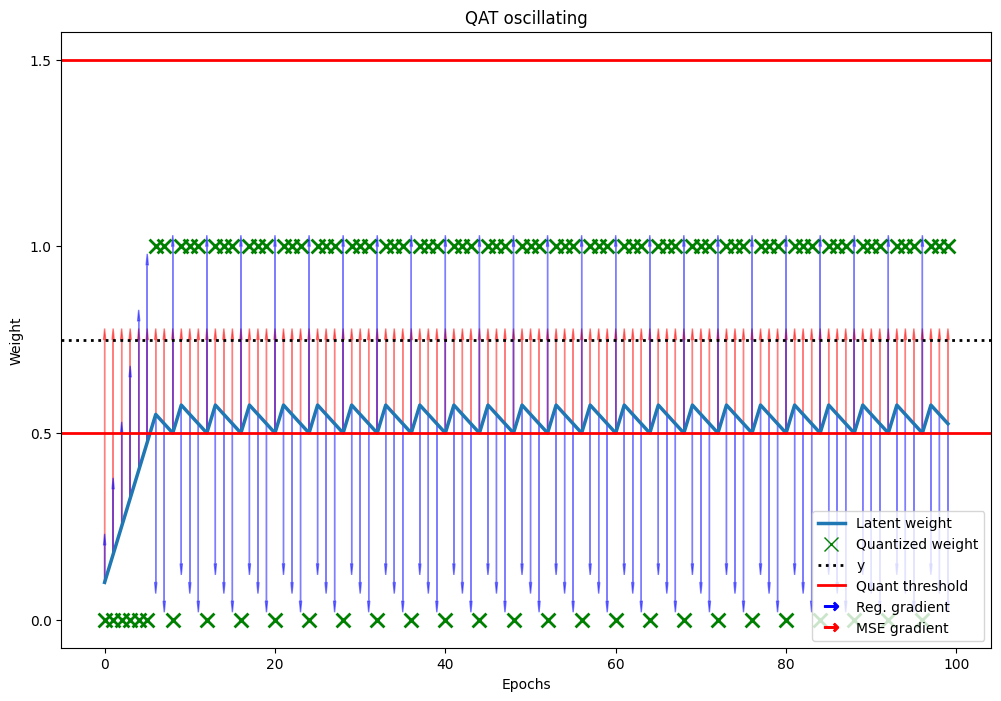

In [5]:
# Create the plot
fig, ax1 = plt.subplots(figsize=(12, 8))
ax1.scatter(range(iterations), qw_values, color='g', label='Quantized weight', marker='x', s=100, linewidth=2)
ax1.set_xlabel('Epochs')
line2, = ax1.plot(range(iterations), w_values, label='Latent weight', linewidth=2.5)
ax1.set_ylabel('Weight')

# Add arrows
for i in range(iterations):
    ax1.arrow(i, w_values[i], 0, mse_values[i], head_width=0.25, head_length=0.03, fc='red', ec='red', alpha=0.5)
    ax1.arrow(i, w_values[i], 0, reg_values[i], head_width=0.25, head_length=0.03, fc='b', ec='b', alpha=0.5)

red_arrow = mpatches.FancyArrowPatch((0, 0), (0, 1), color='red', label='MSE gradient', mutation_scale=10)
blue_arrow = mpatches.FancyArrowPatch((0, 0), (0, 1), color='blue', label='Reg. gradient', mutation_scale=10)
red_arrow = Line2D([0], [0], marker=r'$\rightarrow$', color="red", markersize=10, linestyle='None', label='MSE gradient')
blue_arrow = Line2D([0], [0], marker=r'$\rightarrow$', color="blue", markersize=10, linestyle='None', label='Reg. gradient')

ax1.axhline(y=0.5, color='r', linestyle='-', label='y', linewidth=2)

lines = [ax1.axhline(y=y, color='black', linestyle=':', label='y', linewidth=2),
         ax1.axhline(y=1.5, color='r', linestyle='-', label='Quant threshold', linewidth=2)]
arrows = [blue_arrow, red_arrow]

quantized_weights = Line2D([0], [0], color='g', marker='x', markersize=10, linewidth=5, linestyle='None', label='Quantized weight')
ax1.legend(handles= [line2, quantized_weights] + lines + arrows, loc='lower right')
ax1.yaxis.set_major_locator(MultipleLocator(0.5))

plt.title('QAT oscillating')
plt.show()